# TASK 18

**The task is to perform statistical analysis using this dataset. https://www.kaggle.com/datasets/abrambeyer/openintro-possum. To document in detail, the interpretation of the results from all the measures of centre, all measures of spread,  and outlier detection mechanisms. And to be intuitive about the statistical insight and information that can be getton from the data.**

## Data injection

In [4]:
# importing libries
import pandas as pd
import  matplotlib.pyplot as plt


# installing kagglehub
! pip install kagglehub --quiet

# import kagglehub and path libary
import kagglehub
from pathlib import Path

# download data set and set path
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
possum = Path('possum.csv')
path_full = path / possum

# load data
df = pd.read_csv(path_full)

## Pleminary Data Analysis 

### Checking the snapshot of the data

In [ ]:
df.head() # checking the first five rows

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df.tail() # checking the last five rows

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


## Data cleaning

### Let check and clean the data if needed

In [7]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
# let fill the missing values with mean

# for age with 2 missing value
df['age']=df['age'].fillna(df['age'].mean())

# for footlght with 1 missing value
df['footlgth']=df['footlgth'].fillna(df['footlgth'].mean())


In [ ]:
df.isna().sum() #checking if correctly cleaned

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
# let check for duplicate if exist
df.duplicated().sum() 

# Standardize gender data for any case mistyped
df[df['sex']==df['sex'].str.upper()] #checking
# df['sex'] = df['sex'].str.lower().str.strip()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [12]:
# Make sure each column has the correct type (int, float, object, datetime)
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [13]:
# I will like to rename some column for clearity
df.rename(columns={ 
    'hdlngth' : 'head_length',
    'totlngth':'total_length',
    'taill': 'tail',
    'footlgth': 'foot_length'
},inplace=True)

In [14]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'head_length', 'skullw',
       'total_length', 'tail', 'foot_length', 'earconch', 'eye', 'chest',
       'belly'],
      dtype='object')

## Descriptive Data Analysis

### My focus will be on Sex, hdlngth (head length), totlngth (total length), tail, footlgth (foot length),  and eyes

In [15]:

# let extract only the column I want to focus on
focus_df=df[['sex','head_length','total_length','tail','foot_length','eye']]
focus_df.head(2)

,sex,head_length,total_length,tail,foot_length,eye
0,m,94.1,89.0,36.0,74.5,15.2
1,f,92.5,91.5,36.5,72.5,16.0


### Check for outliers from the data

In [16]:
# first let check data description and look out for mean and median to know if our data is normally distributed
print("The Mean")
print (focus_df.groupby('sex').mean())
print("\nThe Median")
print(focus_df.groupby('sex').median())

The Mean
     head_length  total_length       tail  foot_length        eye
sex                                                              
f      92.148837     87.906977  37.104651    69.096726  14.811628
m      92.922951     86.511475  36.942623    68.009836  15.211475

The Median
     head_length  total_length  tail  foot_length   eye
sex                                                    
f           92.5          88.5  37.5         70.3  14.8
m           93.2          86.0  36.5         66.9  15.0


**we can see that our data is normally distributed, so let use boxplot to determine the outline.**

### Now it is time for me to group the data into male and female to check outliers

Text(0.5, 0.98, '')

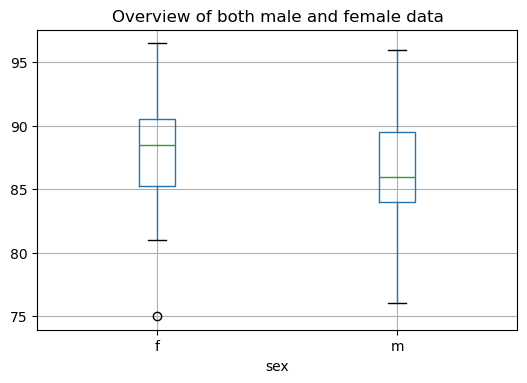

In [17]:
# let check for outliers in total lenght first
focus_df.boxplot(column="total_length", by="sex", figsize=(6,4))
plt.title("Overview of both male and female data")
plt.suptitle("")

In [18]:
# I can see outlier in female data.. Since we are going to be removing outliers for each column (features) if exist
# Then let create function to remove outlier

def remove_outliers(df, cols):              #Remove outliers from multiple columns in a DataFrame using the IQR method.
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR= Q3 - Q1
        bound= 1.5 * IQR
        lower_bound= Q1 - bound
        upper_bound= Q3 + bound
        # Keep only rows within bounds for this column
        df_clean= df_clean[(df_clean[col]>=lower_bound) & (df_clean[col]<=upper_bound)]
        
    return df_clean


### Let remove all outliers from all the column in our dataFrame


In [19]:
#Let remove all outliers from all the column in our dataFrame
cols=['head_length','total_length','tail','foot_length','eye']
focus_df= remove_outliers(focus_df,cols)


### Lets get the description for both gender by head length

In [ ]:
# Lets get the description for each gender by head length
print( focus_df.groupby('sex')['head_length'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['head_length'].median().round(2)
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['head_length'].var().round(2)
print(f"Male: {male}\nFemale: {female}")

     count       mean       std   min     25%    50%     75%   max
sex                                                               
f     42.0  92.066667  2.548425  84.7  90.625  92.45  93.575  96.9
m     55.0  92.669091  3.591805  85.1  90.650  92.90  95.200  99.9

The median of the data is: 
Male: 92.9
Female: 92.45

The variance of the data is: 
Male: 12.9
Female: 6.49


### Lets get the description for both gender by tail length/size

In [ ]:
# Lets get the description for each gender by tail length/size
print( focus_df.groupby('sex')['tail'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['tail'].median().round(2)
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['tail'].var().round(2)
print(f"Male: {male}\nFemale: {female}")

     count       mean       std   min   25%    50%     75%   max
sex                                                             
f     42.0  37.130952  1.844767  32.0  36.0  37.75  38.375  41.0
m     55.0  36.672727  1.851471  32.0  35.5  36.50  38.000  41.5

The median of the data is: 
Male: 36.5
Female: 37.75

The variance of the data is: 
Male: 3.43
Female: 3.4


### Lets get the description for both gender by total length

In [ ]:
# Lets get the description for each gender by total length
print( focus_df.groupby('sex')['total_length'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['total_length'].median().round(2)
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['total_length'].var().round(2)
print(f"Male: {male}\nFemale: {female}")

     count      mean       std   min     25%    50%    75%   max
sex                                                             
f     42.0  87.97619  4.207937  75.0  85.625  88.75  90.50  96.5
m     55.0  86.14000  4.174907  76.0  84.000  85.50  89.25  93.7

The median of the data is: 
Male: 85.5
Female: 88.75

The variance of the data is: 
Male: 17.43
Female: 17.71


### Lets get the description for both gender by foot_length

In [ ]:
# Lets get the description for both gender by foot length/size
print("\nThe description for both gender by foot length: ")
print( focus_df.groupby('sex')['foot_length'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['foot_length'].median().round(2)
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['foot_length'].var().round(2)
print(f"Male: {male}\nFemale: {female}")


The description for both gender by foot length: 
     count       mean       std   min    25%    50%   75%   max
sex                                                            
f     42.0  69.218077  4.845881  60.3  65.10  70.45  72.8  77.9
m     55.0  67.918182  4.015806  62.0  64.45  66.90  71.5  75.0

The median of the data is: 
Male: 66.9
Female: 70.44999999999999

The variance of the data is: 
Male: 16.13
Female: 23.48


### Lets get the description for both gender by eye size

In [24]:
# Lets get the description for both gender by foot eye
print("\nThe description for both gender by eye: ")
print( focus_df.groupby('sex')['eye'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['eye'].median()
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['eye'].var().round(2)
print(f"Male: {male}\nFemale: {female}")


The description for both gender by eye: 
     count       mean       std   min    25%    50%    75%   max
sex                                                             
f     42.0  14.750000  0.958976  13.0  14.05  14.75  15.40  17.1
m     55.0  15.056364  0.909775  12.8  14.45  15.00  15.75  17.0

The median of the data is: 
Male: 15.0
Female: 14.75

The variance of the data is: 
Male: 0.83
Female: 0.92


### Overall Description

In [25]:
# overall mean
print(f'The mean for all the features are: \n {focus_df.groupby('sex').mean()}')
print()
# overall median
print(f'The median for all the features are: \n {focus_df.groupby('sex').median()}')
print()
# overall variance
print(f'The variance for all the features are: \n {focus_df.groupby('sex').var()}')

The mean for all the features are: 
      head_length  total_length       tail  foot_length        eye
sex                                                              
f      92.066667      87.97619  37.130952    69.218077  14.750000
m      92.669091      86.14000  36.672727    67.918182  15.056364

The median for all the features are: 
      head_length  total_length   tail  foot_length    eye
sex                                                      
f          92.45         88.75  37.75        70.45  14.75
m          92.90         85.50  36.50        66.90  15.00

The variance for all the features are: 
      head_length  total_length      tail  foot_length       eye
sex                                                            
f       6.494472     17.706736  3.403165    23.482562  0.919634
m      12.901064     17.429852  3.427946    16.126700  0.827690


## Interpretation
_________________________________________________________
**Interpreting The Results Above -Gender of Posssum based on features like (sex, head_length, total_length, tail, foot_length, and eye)**
_________________________________________________________


**Head Length**

**Mean & Median**: Males (≈92.67 / 92.90) have slightly larger head lengths than females (≈92.07 / 92.45).

**Variance:** Males (12.90) show more variability compared to females (6.49), meaning male head sizes differ more among individuals.

```Suggests males generally have larger and more variable head sizes.```

**Total Length**

**Mean & Median**: Females (≈87.98 / 88.75) have slightly longer body than males (≈86.14 / 85.50).

**Variance:** Females(17.71) and males(17.42), meaning both have similar variability in length sizes among individuals.

```Suggests female slightly longer than male but with similar variability in length sizes.```

**Tail Length**

**Mean & Median**: Females (≈37.13 / 37.75) have slightly longer tail than males (≈36.67 / 36.50).

**Variance:** Females(3.40) and males(3.43), shows that both have very close disperity in tail lengths.

```Suggests both female and male has very close tail length.```

**Foot Length**

**Mean & Median**: Females (≈69.22 / 70.45) have slightly longer foot than males (≈67.92 / 66.90).

**Variance:** Female (23.48) show more variability compared to females (≈16.13), meaning female foot length differ more among individuals.

```Suggests females generally have longer and more variable foot length.```

**Eye Size**

**Mean & Median**: Very close for males(15.75, 14.75) and female(≈15.06 / 15.00) with male having slightly bigger eye size than female on average.

**Variance:** Female (≈0.92) and male(≈0.83) show that  females has a very slightly bigger eyes size variability compare to males.

```Suggests that eyes size is consistence across sexes.```

**Overall Conclusion**

- **Males:** → Larger heads, slightly larger eyes.
- **Females:** → Longer bodies and feet.

**Less Useful Features for Differentiation (very close between sexes)**
Tail length, eye size (slightly bigger in males, though with small variation) and total length.

**Most Distinctive Features**

- Head length (bigger in males)
- Foot length (bigger in females)

## Visualization

### Mean comparison (Measure of center)

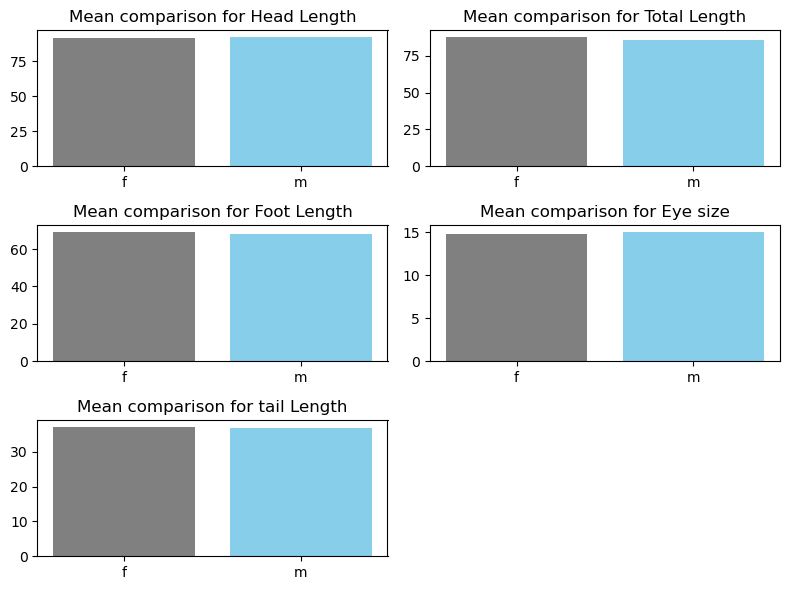

In [26]:
df= focus_df.groupby("sex").mean()
# plot 2 x 2 bar chart mean comparison for all features across the sexes
plt.figure(figsize=(8,6))

plt.subplot(3,2,1)
plt.bar(df.index, df["head_length"], color=["grey","skyblue"])
plt.title("Mean comparison for Head Length")

plt.subplot(3,2,2)
plt.bar(df.index, df["total_length"], color=["grey","skyblue"])
plt.title("Mean comparison for Total Length")

plt.subplot(3,2,3)
plt.bar(df.index, df["foot_length"], color=["grey","skyblue"])
plt.title("Mean comparison for Foot Length")

plt.subplot(3,2,4)
plt.bar(df.index, df["eye"], color=["grey","skyblue"])
plt.title("Mean comparison for Eye size")

plt.subplot(3,2,5)
plt.bar(df.index, df["tail"], color=["grey","skyblue"])
plt.title("Mean comparison for tail Length")


plt.tight_layout()
plt.show()

### Variance  comparison (Measure od spread)

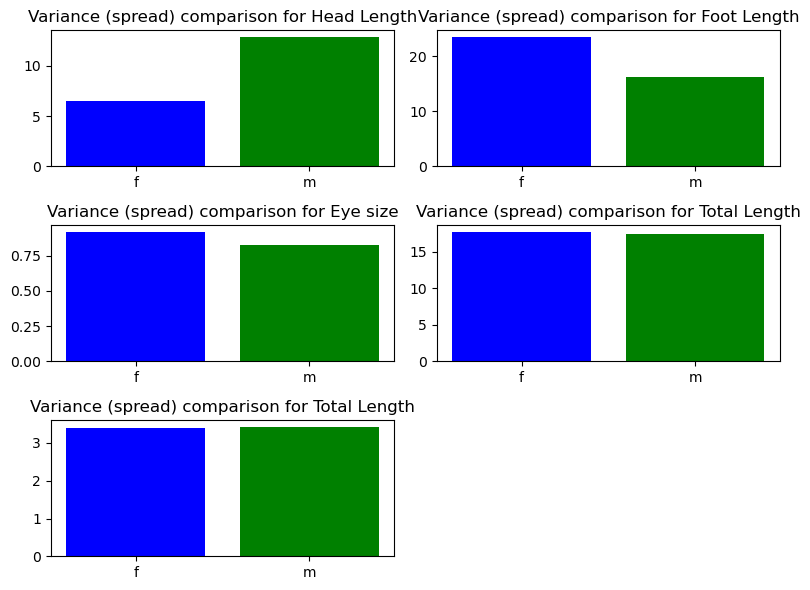

In [27]:
df_var= focus_df.groupby("sex").var()
# plot 2 x 2 bar chart mean comparison for all features across the sexes
plt.figure(figsize=(8,6))

plt.subplot(3,2,1)
plt.bar(df_var.index, df_var["head_length"], color=["blue","green"])
plt.title("Variance (spread) comparison for Head Length")

plt.subplot(3,2,2)
plt.bar(df_var.index, df_var["foot_length"], color=["blue","green"])
plt.title("Variance (spread) comparison for Foot Length")

plt.subplot(3,2,3)
plt.bar(df_var.index, df_var["eye"], color=["blue","green"])
plt.title("Variance (spread) comparison for Eye size")

plt.subplot(3,2,4,)
plt.bar(df_var.index, df_var["total_length"], color=["blue","green"])
plt.title("Variance (spread) comparison for Total Length")

plt.subplot(3,2,5)
plt.bar(df_var.index, df_var["tail"], color=["blue","green"])
plt.title("Variance (spread) comparison for Total Length")

plt.tight_layout()
plt.show()